**Testing out features provided in SpaCy library**

In [2]:
import spacy
import json

# load english language model
nlp = spacy.load('en_core_web_sm')

text = "This is a sample sentence."

# create spacy doc
doc = nlp(text)

pos_tags_dict = {}
# applying POS to each token
for token in doc:
    pos_tags_dict[token.text] = token.pos_

print(pos_tags_dict)

json_object = json.dumps(pos_tags_dict, indent = 4) 
print(json_object)

{'This': 'PRON', 'is': 'AUX', 'a': 'DET', 'sample': 'NOUN', 'sentence': 'NOUN', '.': 'PUNCT'}
{
    "This": "PRON",
    "is": "AUX",
    "a": "DET",
    "sample": "NOUN",
    "sentence": "NOUN",
    ".": "PUNCT"
}


In [3]:
# from spacytextblob.spacytextblob import SpacyTextBlob
# nlp.add_pipe('spacytextblob')
# text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
# doc = nlp(text)
# doc._.blob.polarity                            
# doc._.blob.subjectivity                        
# doc._.blob.sentiment_assessments.assessments   
# doc._.blob.ngrams()    

In [4]:
# filtering out tokens based on POS
for token in doc:
    # check token pos
    if token.pos_=='NOUN':
        # print token
        print(token.text)

sample
sentence


In [5]:
text = "Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows"
# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

Great -> ADJ
work -> NOUN
vehicle -> NOUN
. -> PUNCT
Drives -> NOUN
nice -> ADJ
. -> PUNCT
has -> VERB
lots -> NOUN
of -> ADP
room -> NOUN
. -> PUNCT
Easy -> ADJ
to -> PART
handle -> VERB
, -> PUNCT
bucket -> NOUN
seats -> NOUN
electric -> ADJ
windows -> NOUN


In [6]:
# Dependency graph
from spacy import displacy 
displacy.render(doc, style='dep',jupyter=True)



In [7]:
# !pip install pydot

Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows


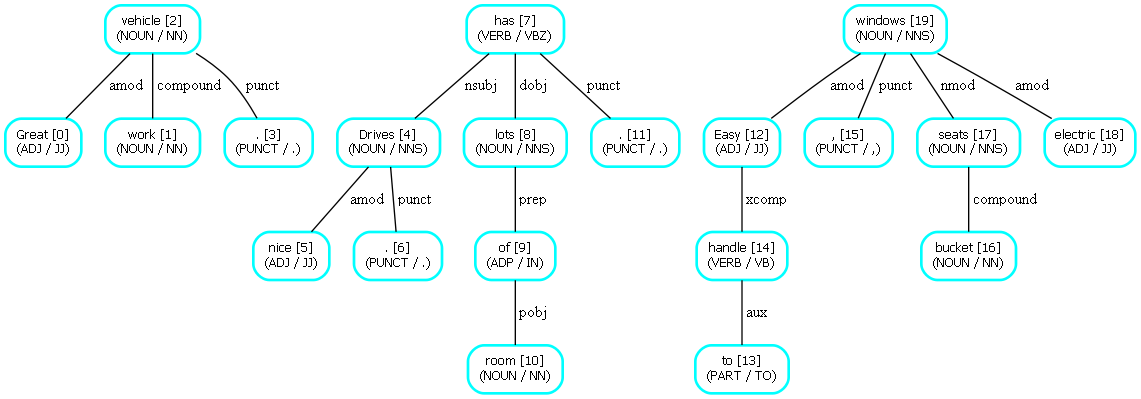

In [8]:
from IPython.display import Image, display
import visualise_spacy_tree
print(doc)
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

In [9]:
# Extracting subject and object
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print("Subject is : " + token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print("Object is : " + token.text)
        
        

Subject is : Drives
Object is : lots


In [10]:
# pattern matching
from spacy.matcher import Matcher

sentences = ["the prime minister of India Indira Gandhi and PM Jawaharlal Nehru believed in working together in unity and with the principles of the UN",
 "Indira Gandhi believed in striking a balance between global production and consumption",
"PM Narendra Modi believes that economic empowerment and upliftment of any nation involves the empowerment of its women",
"PM Narendra Modi has launched several schemes that will help India achieve its SGD goals"]

# function to find sentences containing PMs of India
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'prime'},
              {'LOWER':'minister'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", [pattern]) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end 
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    for name in names:
        if (name.split()[2] == 'of') and (name.split()[3] != "India"):
                names.remove(name)
            
    return names

for sentence in sentences:
  if find_names(sentence):
    print(sentence)



the prime minister of India Indira Gandhi and PM Jawaharlal Nehru believed in working together in unity and with the principles of the UN


Text Summarization


In [11]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

def summarize(long_rev):
  summ = spacy.load('en_core_web_sm')
  long_rev = summ(long_rev)
  print(f"Number of sentences : {len(list(long_rev.sents))}\n")

  keyword = []
  stopwords = list(STOP_WORDS)
  pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
  for token in long_rev:
      if(token.text in stopwords or token.text in punctuation):
          continue
      if(token.pos_ in pos_tag):
          keyword.append(token.text)
  freq_word = Counter(keyword)
  print("Filtering tokens \n")
  print(freq_word.most_common(5))

# Normalization
# Each sentence is weighed based on the 
# frequency of the token present in each sentence

  max_freq = Counter(keyword).most_common(1)[0][1]
  for word in freq_word.keys():  
          freq_word[word] = (freq_word[word]/max_freq)
  freq_word.most_common(5)

# Strength of sentences
  sent_strength={}
  for sent in long_rev.sents:
      for word in sent:
          if word.text in freq_word.keys():
              if sent in sent_strength.keys():
                  sent_strength[sent]+=freq_word[word.text]
              else:
                  sent_strength[sent]=freq_word[word.text]
  print("sentences with their respective strengths \n")
  print(sent_strength)

# the nlargest function returns a list containing the top 3 sentences which are stored as summarized_sentences

  summarized_sentences = nlargest(3, sent_strength, key=sent_strength.get)
  print("top 3 sentences with max strength ")
  print(summarized_sentences,"\n")

  print("Final Summarized Review ")
  final_sentences = [ w.text for w in summarized_sentences ]
  summary = ' '.join(final_sentences)
  print(summary)


In [12]:
long_rev = "BMW has joined the facelift bandwagon with the X3. Being the third entry, it might have been a bit late to the party, behind the Audi Q5 facelift and the Volvo XC60 facelift, but it sure has come well prepared. \
  This mid-life update gives the X3 a much-needed shot in the arm to stay relevant in the hugely competitive ‘midsize luxury SUV’ segment.\
  The exterior design gets some noticeable changes that not only look modern and funky, but also help it stand out from the crowd. Starting at the front, you get a revamped face where the grille has grown in size. Now, in brushed metal and single-piece avatar, it still isn’t as polarising as the gigantic one on the X7, but it is a prominent part of the fascia. Look closer, and you will also notice the ‘active air stream’ that acts as a curtain inside the grille. \
  It opens and shuts depending on the engine temperature and helps with air flow, and reduces drag.\
  Then there are the adaptive LED headlamps that get ‘J-blades’ for the Daytime Running Lamps, like the ones on the facelifted BMW 5 series. \
  The headlamp housing is sleeker and sharper, and they look a lot more modern now. \
  On top-spec ‘M-sport’ trim (like the one seen here), it gets aggressive looking bumpers with plenty of angles and a contrasting piano black panel for the air dam, adding to the sporty appeal. \
  A special mention must be made to the lovely Brooklyn Grey paint shade that looks absolutely superb, especially in M-sport guise. For those who don’t mind being a bit bold, this is a shade worth a thought."
  
summarize(long_rev)


Number of sentences : 13

Filtering tokens 

[('facelift', 3), ('air', 3), ('BMW', 2), ('X3', 2), ('bit', 2)]
sentences with their respective strengths 

{BMW has joined the facelift bandwagon with the X3.: 3.0, Being the third entry, it might have been a bit late to the party, behind the Audi Q5 facelift and the Volvo XC60 facelift, but it sure has come well prepared.: 5.666666666666666,   This mid-life update gives the X3 a much-needed shot in the arm to stay relevant in the hugely competitive ‘midsize luxury SUV’ segment.: 5.333333333333333,  The exterior design gets some noticeable changes that not only look modern and funky, but also help it stand out from the crowd.: 4.666666666666666, Starting at the front, you get a revamped face where the grille has grown in size.: 2.333333333333333, Now, in brushed metal and single-piece avatar, it still isn’t as polarising as the gigantic one on the X7, but it is a prominent part of the fascia.: 3.3333333333333335, Look closer, and you will 

In [ ]:
# Implementing a knowledge graph to get a better understanding of subject and object relations
import spacy
import json
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

def knowledge_graph(text):
    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')
    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))
        
    printGraph(triples)

text = "The Honda City is a well balanced car with an amazing engine to drive. It runs very smoothly and rarely breaks down"

knowledge_graph(text)

The Honda City is a well balanced car with an amazing engine to drive. It runs very smoothly and rarely breaks down
The -> det
Honda -> compound
City -> nsubj
is -> ROOT
a -> det
well -> advmod
balanced -> amod
car -> attr
with -> prep
an -> det
amazing -> amod
engine -> nsubj
to -> aux
drive -> pcomp
. -> punct
City engine , be balanced car amazing , 
It -> nsubj
runs -> ROOT
very -> advmod
smoothly -> advmod
and -> cc
rarely -> advmod
breaks -> conj
down -> prt
It , run , 


TypeError: '_AxesStack' object is not callable

**Combining all Information Extraction operations into a function**

In [ ]:
from spacy.symbols import nsubj, VERB, ADJ

def IE_Operations(review):
  # create spacy doc
  doc = nlp(review)
  adjectives = set()
  verbs_all = set()
  # applying POS to each token
  print("POS Tagging : ")
  for token in doc:
      if token.pos_ not in ["SPACE", "DET", "ADP", "PUNCT", "AUX", "SCONJ", "CCONJ", "PART"]:
        print(token.text,'->',token.pos_)
      if(token.pos_=="ADJ"):
        adjectives.add(token.text)
      if(token.pos_=="VERB"):
        verbs_all.add(token.text)

  print("Dependency Graph : \n")

  print("************************************************************\n")
  displacy.render(doc, style='dep',jupyter=True)
  print("************************************************************\n")

  print("Verb with subject : \n")

  # Finding a verb with a subject
  verbs = set()
  for possible_subject in doc:
      if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
          verbs.add(possible_subject.head)
  print(verbs)
  print("************************************************************\n")

  print("Adjectives : \n")

  # Finding adjectives with a subject
  print(adjectives)
  print("************************************************************\n")
  # NER
  for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print("************************************************************\n")


  print("Knowledge Graph : \n")

  knowledge_graph(review)

  print("************************************************************\n")


  print("Summarization of review : ")
  summarize(review)

  print("************************************************************\n")


In [1]:
# from spacy.symbols import nsubj, VERB, ADJ
# import eng_spacysentiment
# sentiment = eng_spacysentiment.load()
# review = "I hate chocolate"
# doc = sentiment(review)
# print(doc.cats)
# print("************************************************************\n")


**Working with a Dataset**
For the purpose of our investigation, we utilise the [Edmunds-Consumer Car Ratings and Reviews ](https://www.kaggle.com/ankkur13/edmundsconsumer-car-ratings-and-reviews)
 Dataset, containing consumer's thought and the star rating of car manufacturer/model/type for 62 popular brands

In [2]:
# function to preprocess speech
import re
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text


*For the purpose of testing, we chose one of the csv files that we extracted from the dataset*

In [5]:
import pandas as pd

df = pd.read_csv('Auto-NLP/Dataset/Scraped_Car_Review_dodge.csv',delimiter=',', nrows = 100)
df.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875


In [6]:
# preprocessing speeches
df['Review_clean'] = df['Review'].apply(clean)

In [7]:
df.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_clean
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625,It been a great delivery vehicle for my cafe ...
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125,Bought this car as a commuter vehicle for a v...
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000,"This van rocks its the best, lots of \rroom. ..."
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500,Great work vehicle. Drives nice. has lots of ...
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875,Good solid frame and suspension. Well equipp...


*Examining dataset for keywords*


In [8]:
df['Review_clean'][2]

' This van rocks its the best, lots of \rroom. I carry a lot of cargo in mine \rand i tow a lot too, it works great!'

In [ ]:
# postive words : great, amazing
# negative words : dissapointing, horrible, waste

In [ ]:
import numpy as np
reviews = df['Review_clean'][0:10]
reviews = np.array(reviews)
reviews[8]

' This is a left over new van. Great deal '

POS Tagging : 
It -> PRON
been -> VERB
great -> ADJ
delivery -> NOUN
vehicle -> NOUN
my -> PRON
cafe -> NOUN
business -> NOUN
good -> ADJ
power -> NOUN
economy -> NOUN
match -> NOUN
easily -> ADV
taken -> VERB
care -> NOUN
repaired -> VERB
anything -> PRON
replaced -> VERB
anything -> PRON
tires -> NOUN
normal -> ADJ
maintenance -> NOUN
items -> NOUN
Upgraded -> VERB
tires -> NOUN
Michelin -> PROPN
LX -> PROPN
series -> NOUN
helped -> VERB
fuel -> VERB
economy -> NOUN
buy -> VERB
another -> PRON
second -> ADJ
Dependency Graph : 

************************************************************



************************************************************

Verb with subject : 

{taken, helped, been}
************************************************************

Adjectives : 

{'great', 'good', 'second', 'normal'}
************************************************************

Michelin LX series 207 225 PERSON
second 270 276 ORDINAL
************************************************************

Knowledge Graph : 

 It been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Havent repaired anything or replaced anything but tires and normal maintenance items. Upgraded tires to Michelin LX series helped fuel economy. Would buy another in a second
It -> nsubj
been -> ccomp
a -> det
great -> amod
delivery -> compound
vehicle -> attr
for -> prep
my -> poss
cafe -> nmod
business -> nmod
good -> amod
power -> pobj
, -> punct
economy -> compound
match -> nsubj
easily -> advmod
taken -> ROOT
care -> dobj
of -> prep
. -> punct
It match , great vehicl

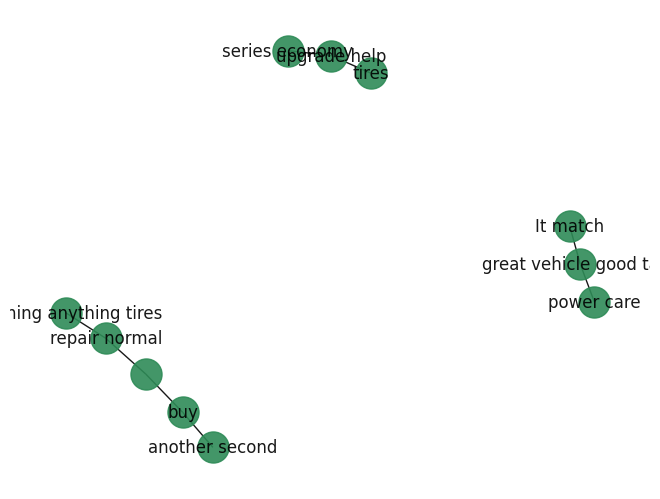

************************************************************

Summarization of review : 
Number of sentences : 4

Filtering tokens 

[('economy', 2), ('tires', 2), ('great', 1), ('delivery', 1), ('vehicle', 1)]
sentences with their respective strengths 

{ It been a great delivery vehicle for my cafe business good power, economy match easily taken care of.: 6.0, Havent repaired anything or replaced anything but tires and normal maintenance items.: 3.5, Upgraded tires to Michelin LX series helped fuel economy.: 5.0, Would buy another in a second: 1.0}
top 3 sentences with max strength 
[ It been a great delivery vehicle for my cafe business good power, economy match easily taken care of., Upgraded tires to Michelin LX series helped fuel economy., Havent repaired anything or replaced anything but tires and normal maintenance items.] 

Final Summarized Review 
 It been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Upgraded tires to Michelin 

************************************************************

Verb with subject : 

{had, like, had, noticed, lost}
************************************************************

Adjectives : 

{'better', 'disappointed', 'old', 'large', 'separate', 'difficult', 'sluggish', 'comfortable', 'rough'}
************************************************************

1997 114 118 DATE
five years 355 365 DATE
************************************************************

Knowledge Graph : 

 Bought this car as a commuter vehicle for a van pool.  I was very disappointed in the vehicle in comparison to a 1997 model I had previously.  The motor was sluggish and tended to have a rough idle.  The A/C was better than the old van, but still lacked a separate control for the front and back.  What I was most disappointed with was that in moving up five years, I lost driver room, the ability to adjust the steering wheel to where I like it, and the passenger seats, by all accounts were less comfortable.  What

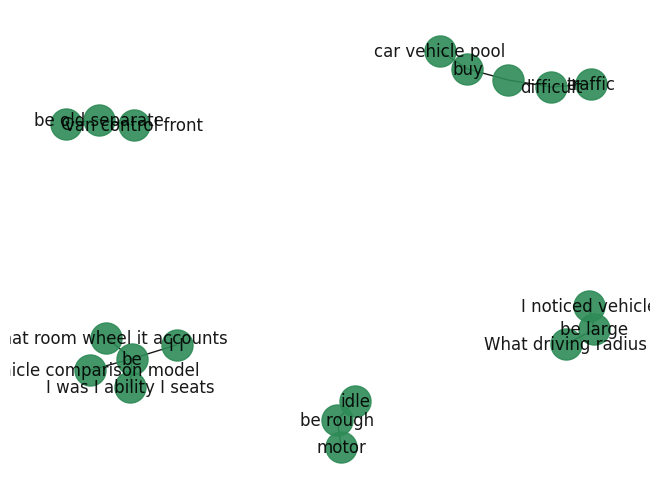

************************************************************

Summarization of review : 
Number of sentences : 7

Filtering tokens 

[('vehicle', 3), ('van', 2), ('disappointed', 2), ('Bought', 1), ('car', 1)]
sentences with their respective strengths 

{ Bought this car as a commuter vehicle for a van pool.  : 3.0, I was very disappointed in the vehicle in comparison to a 1997 model I had previously.  : 2.333333333333333, The motor was sluggish and tended to have a rough idle.  : 1.6666666666666665, The A/C was better than the old van, but still lacked a separate control for the front and back.  : 3.0000000000000004, What I was most disappointed with was that in moving up five years, I lost driver room, the ability to adjust the steering wheel to where I like it, and the passenger seats, by all accounts were less comfortable.  : 5.333333333333332, What I noticed in driving is that the vehicle had a very large turning radius.  : 2.6666666666666665, Very difficult to maneuver in traffic

************************************************************

Verb with subject : 

{tow, rocks, carry, works}
************************************************************

Adjectives : 

{'great', 'best'}
************************************************************

************************************************************

Knowledge Graph : 

and i tow a lot too, it works great!
This -> det
van -> nsubj
rocks -> ROOT
its -> poss
the -> det
best -> dobj
, -> punct
lots -> dobj
of -> prep
 -> dep
room -> pobj
. -> punct
van , rock , best lots room
I -> nsubj
carry -> ccomp
a -> det
lot -> dobj
of -> prep
cargo -> pobj
in -> prep
mine -> pobj
 -> dep
and -> cc
i -> nsubj
tow -> conj
a -> det
lot -> npadvmod
too -> advmod
, -> punct
it -> nsubj
works -> ROOT
great -> acomp
! -> punct
I i it , work , lot cargo mine


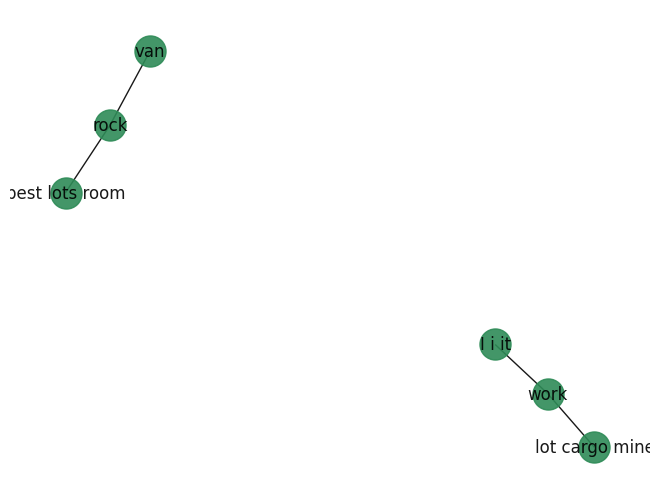

************************************************************

Summarization of review : 
Number of sentences : 2

Filtering tokens 

[('lot', 2), ('van', 1), ('rocks', 1), ('best', 1), ('lots', 1)]
sentences with their respective strengths 

and i tow a lot too, it works great!: 4.5}
top 3 sentences with max strength 
room.] 

Final Summarized Review 
room.
************************************************************

POS Tagging : 
Great -> ADJ
work -> NOUN
vehicle -> NOUN
Drives -> NOUN
nice -> ADJ
has -> VERB
lots -> NOUN
room -> NOUN
Easy -> ADJ
handle -> VERB
bucket -> NOUN
seats -> NOUN
electric -> ADJ
windows -> NOUN
Dependency Graph : 

************************************************************



************************************************************

Verb with subject : 

set()
************************************************************

Adjectives : 

{'Easy', 'electric', 'nice', 'Great'}
************************************************************

************************************************************

Knowledge Graph : 

 Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows
Great -> amod
work -> compound
vehicle -> ROOT
. -> punct
 , great vehicle , 
Drives -> ROOT
nice -> amod
. -> punct
 , drive nice , 
has -> ROOT
lots -> dobj
of -> prep
room -> pobj
. -> punct
 , have , lots room
Easy -> advcl
to -> aux
handle -> xcomp
, -> punct
bucket -> compound
seats -> ROOT
electric -> amod
windows -> appos
 , seat electric , 


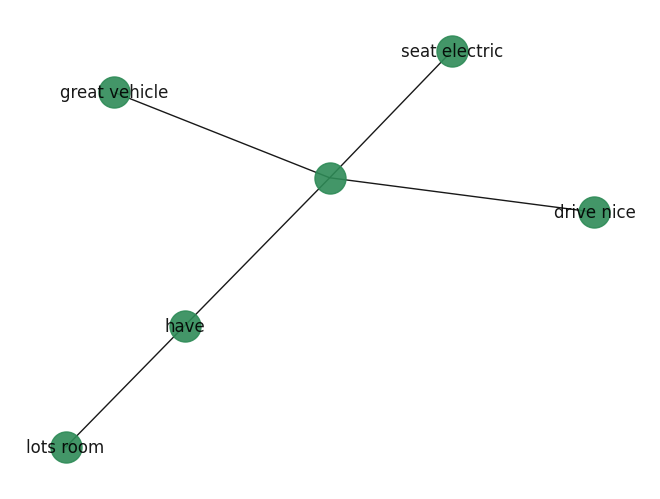

************************************************************

Summarization of review : 
Number of sentences : 4

Filtering tokens 

[('Great', 1), ('work', 1), ('vehicle', 1), ('Drives', 1), ('nice', 1)]
sentences with their respective strengths 

{ Great work vehicle.: 3.0, Drives nice.: 2.0, has lots of room.: 2.0, Easy to handle, bucket seats electric windows: 6.0}
top 3 sentences with max strength 
[Easy to handle, bucket seats electric windows,  Great work vehicle., Drives nice.] 

Final Summarized Review 
Easy to handle, bucket seats electric windows  Great work vehicle. Drives nice.
************************************************************

POS Tagging : 
Good -> ADJ
solid -> ADJ
frame -> NOUN
suspension -> NOUN
Well -> INTJ
equipped -> ADJ
full -> ADJ
power -> NOUN
Gauges -> PROPN
controls -> NOUN
well -> ADV
designed -> VERB
located -> VERB
Nice -> ADJ
drive -> VERB
you -> PRON
up -> ADV
in -> ADV
leg -> NOUN
room -> NOUN
passenger -> NOUN
side -> NOUN
318 -> NUM
engine ->

************************************************************

Verb with subject : 

{lean, seems, jumped, had}
************************************************************

Adjectives : 

{'equipped', 'solid', 'hard', 'whole', 'mechanical', 'flimsy', 'front', 'full', 'Reliable', 'Good', 'weak', 'Nice', 'older', 'Terrible'}
************************************************************

Nice 115 119 GPE
318 186 189 CARDINAL
Three 524 529 CARDINAL
three years 551 562 DATE
Reliable 608 616 WORK_OF_ART
Dodge 650 655 ORG
************************************************************

Knowledge Graph : 

 Good solid frame and suspension.  Well equipped, full power.  Gauges and controls are well designed and located.  Nice to drive once you are up and in.  No leg room on passenger side.  318 engine seems very weak and some spark plugs are very hard to access.  Terrible gas mileage .  Sheet metal is flimsy and dents if you lean against it or bump it.  Paint chips and scratches very easily.  Slidin

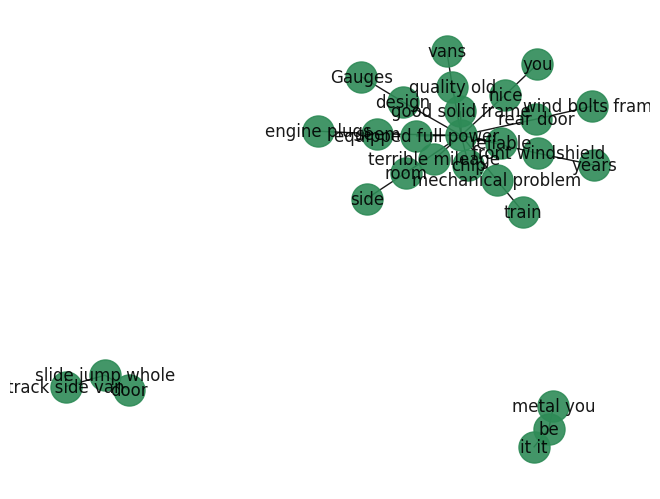

************************************************************

Summarization of review : 
Number of sentences : 15

Filtering tokens 

[('frame', 2), ('drive', 2), ('door', 2), ('Good', 1), ('solid', 1)]
sentences with their respective strengths 

{ Good solid frame and suspension.  : 2.5, Well equipped, full power.  : 1.0, Gauges and controls are well designed and located.  : 2.0, Nice to drive once you are up and in.  : 1.5, No leg room on passenger side.  : 1.5, 318 engine seems very weak and some spark plugs are very hard to access.  : 3.0, Terrible gas mileage .  : 1.5, Sheet metal is flimsy and dents if you lean against it or bump it.  : 3.0, Paint chips and scratches very easily.  : 1.5, Sliding side door jumped the track and scraped the whole side of the van.  : 3.5, Rear door caught in wind and pulled bolts out of frame.  : 4.5, Three front windshields in three years .  : 1.0, No mechanical problems with drive train.  : 2.5, Reliable.  : 0.5, Still not the quality my older Dodg

************************************************************

Verb with subject : 

set()
************************************************************

Adjectives : 

{'early'}
************************************************************

************************************************************

Knowledge Graph : 

 some very early body rust on roof
some -> det
very -> advmod
early -> amod
body -> compound
rust -> ROOT
on -> prep
roof -> pobj
 , early rust , roof


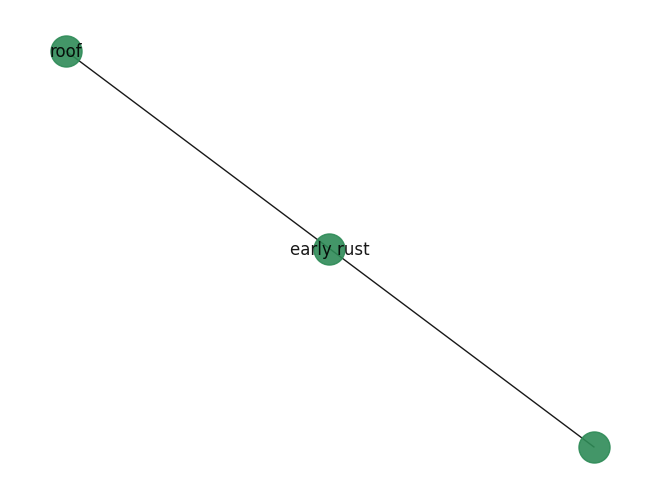

************************************************************

Summarization of review : 
Number of sentences : 1

Filtering tokens 

[('early', 1), ('body', 1), ('rust', 1), ('roof', 1)]
sentences with their respective strengths 

{ some very early body rust on roof: 4.0}
top 3 sentences with max strength 
[ some very early body rust on roof] 

Final Summarized Review 
 some very early body rust on roof
************************************************************

POS Tagging : 
Purchased -> VERB
vehicle -> NOUN
2003 -> NUM
second -> ADJ
hand -> NOUN
15000 -> NUM
miles -> NOUN
owner -> NOUN
review -> NOUN
written -> VERB
2017 -> NUM
only -> ADV
110000 -> NUM
miles -> NOUN
it -> PRON
It -> PRON
great -> ADJ
service -> NOUN
van -> NOUN
my -> PRON
business -> NOUN
flaws -> NOUN
warranty -> NOUN
expired -> VERB
problems -> NOUN
begin -> VERB
Had -> VERB
replace -> VERB
computer -> NOUN
controller -> NOUN
few -> ADJ
times -> NOUN
Fuel -> PROPN
hose -> NOUN
went -> VERB
bad -> ADJ
chair -> N

************************************************************

Verb with subject : 

{begin, went, think, go, helps, replaced, broke, say, replaced, say}
************************************************************

Adjectives : 

{'great', 'accurate', 'second', 'optimistic', 'minor', 'conservative', 'best', 'worst', 'few', 'bad', 'average', 'next'}
************************************************************

2003 26 30 DATE
second 31 37 ORDINAL
15000 miles 48 59 QUANTITY
2017 104 108 DATE
only 110000 miles 114 131 QUANTITY
around $600 571 582 MONEY
farther than 10 615 630 CARDINAL
12/15 miles 708 719 QUANTITY
17 miles 782 790 QUANTITY
************************************************************

Knowledge Graph : 

 Purchased the vehicle in 2003 second hand with 15000 miles from the owner . This review was written in 2017 with only 110000 miles on it! It has been a great service van for my business but not without flaws. After warranty expired problems begin. Had to replace computer c

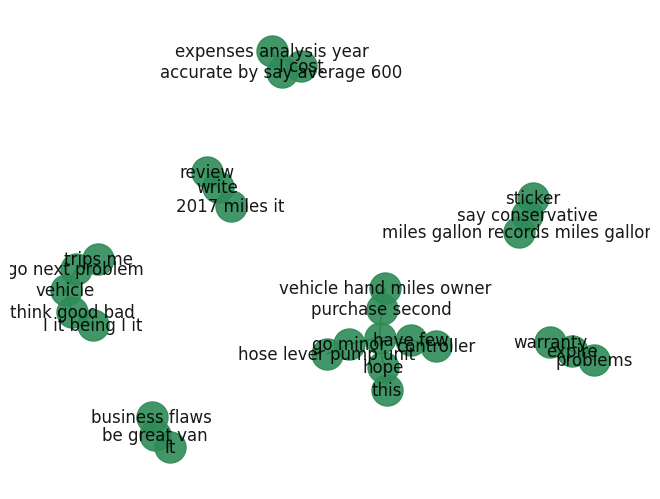

************************************************************

Summarization of review : 
Number of sentences : 11

Filtering tokens 

[('miles', 4), ('vehicle', 3), ('replaced', 3), ('business', 2), ('pump', 2)]
sentences with their respective strengths 

{ Purchased the vehicle in 2003 second hand with 15000 miles from the owner .: 2.75, This review was written in 2017 with only 110000 miles on it!: 1.5, It has been a great service van for my business but not without flaws.: 1.5, After warranty expired problems begin.: 1.0, Had to replace computer controller few times.: 1.25, Fuel hose went bad, chair adjustment lever broke, minor repairs here and there, water pump replaced, temperature control unit replaced, gas tank and pump replaced.: 7.25, Using a very accurate repair expenses controlled by business analysis I can say that the average repair cost is around $600 per year.: 3.5, This vehicle can't go farther than 10 trips without me worrying when would be the next problem.: 1.5, Dea

************************************************************

Verb with subject : 

{produce, buying, stole, feel}
************************************************************

Adjectives : 

{'only', 'automotive', 'everyday', 'regular', 'most', 'right', 'large', 'nice', 'new', 'easy', 'top', 'best', 'quiet', 'few', 'rear', 'available'}
************************************************************

34k 18 21 CARDINAL
Elk 48 51 PERSON
318 219 222 CARDINAL
50k 392 395 DATE
20k 432 435 DATE
One 456 459 CARDINAL
Chryslers 7/70 511 525 PRODUCT
************************************************************

Knowledge Graph : 

 Bought used with 34k,the conversion package by Elk automotive is top rate. Has leather, cd, dvd, rear air, tv, rear stereo, all the goodies. Very easy to drive despite its size, ride is nice and quiet inside. With the 318 engines and regular service these things are allmost bullet proof. As most manufacturers produce very few of the large van conversions any more and the

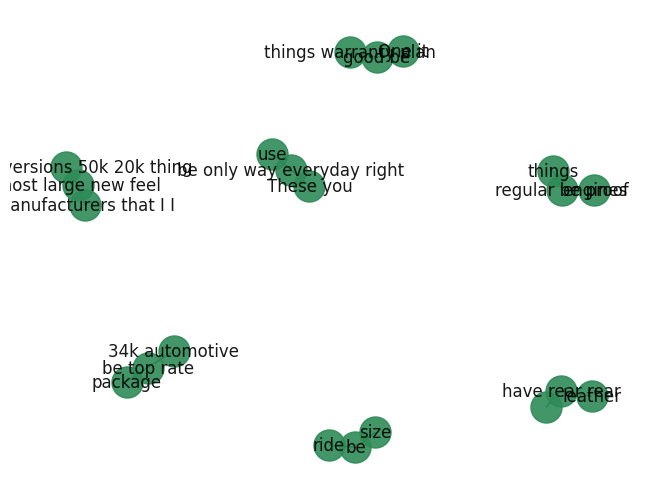

************************************************************

Summarization of review : 
Number of sentences : 7

Filtering tokens 

[('rear', 2), ('things', 2), ('Bought', 1), ('34k', 1), ('conversion', 1)]
sentences with their respective strengths 

{ Bought used with 34k,the conversion package by Elk automotive is top rate.: 3.5, Has leather, cd, dvd, rear air, tv, rear stereo, all the goodies.: 6.0, Very easy to drive despite its size, ride is nice and quiet inside.: 3.0, With the 318 engines and regular service these things are allmost bullet proof.: 4.0, As most manufacturers produce very few of the large van conversions any more and the new ones costing 50k that are available, I feel that for 20k I stole this thing.: 7.0, One of the best things is it still under warranty with Chryslers 7/70 plan.: 3.0, These are the only way to travel, if you are buying for everyday use, it probably not the right vehicle.: 3.5}
top 3 sentences with max strength 
[As most manufacturers produce ve

************************************************************

Verb with subject : 

set()
************************************************************

Adjectives : 

{'new', 'Great'}
************************************************************

************************************************************

Knowledge Graph : 

 This is a left over new van. Great deal 
This -> nsubj
is -> ROOT
a -> det
left -> attr
over -> prep
new -> amod
van -> pobj
. -> punct
This , be left new , van
Great -> amod
deal -> ROOT
 , great deal , 


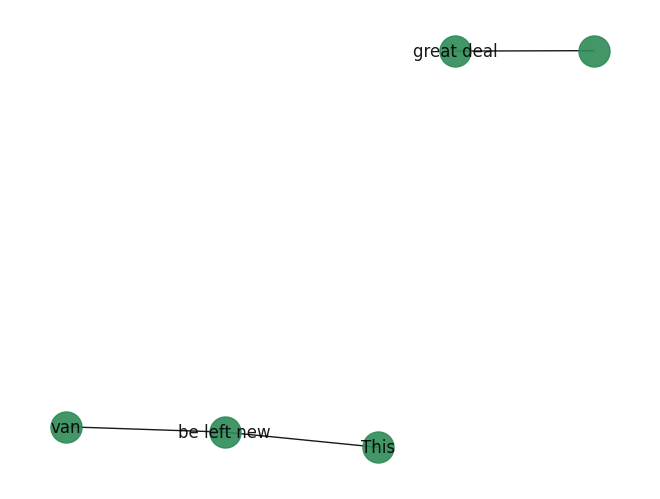

************************************************************

Summarization of review : 
Number of sentences : 3

Filtering tokens 

[('left', 1), ('new', 1), ('van', 1), ('Great', 1), ('deal', 1)]
sentences with their respective strengths 

{This is a left over new van.: 3.0, Great deal: 2.0}
top 3 sentences with max strength 
[This is a left over new van., Great deal] 

Final Summarized Review 
This is a left over new van. Great deal
************************************************************

POS Tagging : 
nan -> PROPN
Dependency Graph : 

************************************************************



************************************************************

Verb with subject : 

set()
************************************************************

Adjectives : 

set()
************************************************************

************************************************************

Knowledge Graph : 

nan
nan -> ROOT
 , nan , 


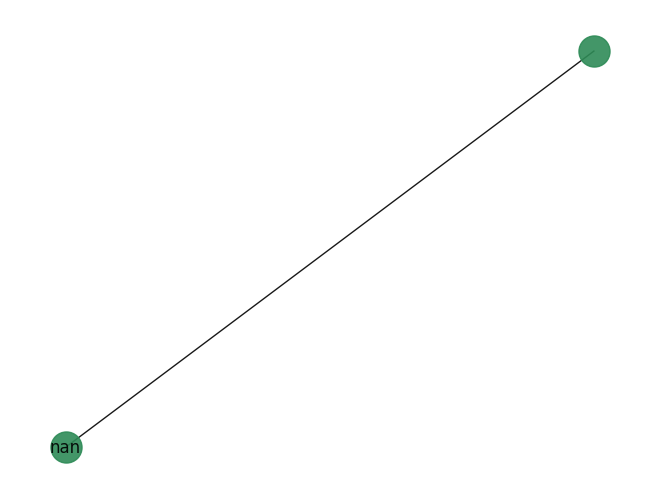

************************************************************

Summarization of review : 
Number of sentences : 1

Filtering tokens 

[('nan', 1)]
sentences with their respective strengths 

{nan: 1.0}
top 3 sentences with max strength 
[nan] 

Final Summarized Review 
nan
************************************************************



In [ ]:
# applying POS tagging to each review in the dataset and preparing dependency graph, knowledge graph
# and filtering out verbs and pronouns to apply sentiment analysis as well
for review in reviews:
  IE_Operations(review)

**Wrapping everything into a main function, taking in parameter of name of car brand.**

Operations performed 


1.   POS tagging
2.   Creating Dependency Graph
3.   Creating Knowledge Graph
4.   Filtering out verbs and adjectives to perform sentiment analysis
5.   Pattern matching to analyse customer review trends
6.   Named Entity Recognition
7. Text Summarization




In [ ]:
def IE_brand(brand):
  path = "/content/Scraped_Car_Review_" + brand + ".csv"
  df = pd.read_csv(path,delimiter=',', nrows = 100)
  df['Review_clean'] = df['Review'].apply(clean)
  df['Review_clean'][2]
  reviews = df['Review_clean'][0:5]
  reviews = np.array(reviews)
  df2 = df["Rating"].mean()
  print(f"Mean sentiment of users associated with the brand :{df2}/5")
  i=0
  for review in reviews:
    i=i+1
    print(f"For review num :{i} \n")
    IE_Operations(review)

Enter a card brand name : ferrari
Mean sentiment of users associated with the brand :4.722727272727273/5
For review num :1 

POS Tagging : 
car -> NOUN
gets -> VERB
great -> ADJ
gas -> NOUN
mileage -> NOUN
best -> ADJ
car -> NOUN
you -> PRON
buy -> VERB
Dependency Graph : 

************************************************************



************************************************************

Verb with subject : 

{buy, gets}
************************************************************

Adjectives : 

{'great', 'best'}
************************************************************

************************************************************

Knowledge Graph : 

 This car gets great gas mileage and is the best car you could buy.
This -> det
car -> nsubj
gets -> ROOT
great -> amod
gas -> compound
mileage -> dobj
and -> cc
is -> conj
the -> det
best -> amod
car -> attr
you -> nsubj
could -> aux
buy -> relcl
. -> punct
car you , get great good car , mileage


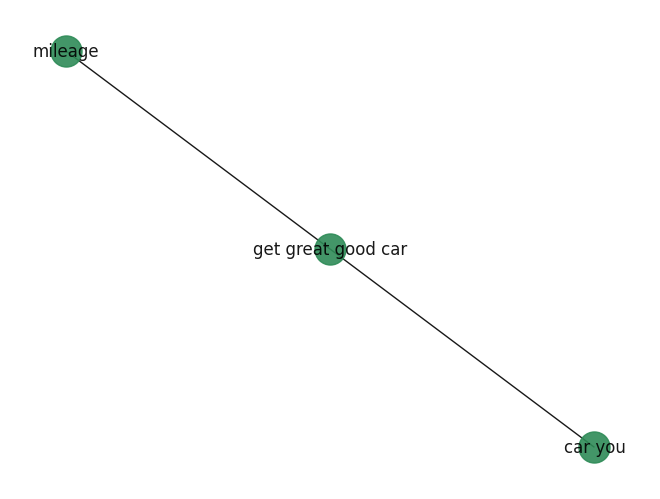

************************************************************

Summarization of review : 
Number of sentences : 2

Filtering tokens 

[('car', 2), ('gets', 1), ('great', 1), ('gas', 1), ('mileage', 1)]
sentences with their respective strengths 

{This car gets great gas mileage and is the best car you could buy.: 5.0}
top 3 sentences with max strength 
[This car gets great gas mileage and is the best car you could buy.] 

Final Summarized Review 
This car gets great gas mileage and is the best car you could buy.
************************************************************

For review num :2 

POS Tagging : 
Owning -> VERB
612 -> NUM
now -> ADV
3 -> NUM
years -> NOUN
using -> VERB
it -> PRON
evey -> NOUN
day -> NOUN
traffic -> NOUN
it -> PRON
just -> ADV
keeps -> VERB
great -> ADJ
paint -> NOUN
job -> NOUN
only -> ADJ
problem -> NOUN
technical -> VERB
it -> PRON
fantastic -> ADJ
far -> ADV
best -> ADJ
car -> NOUN
i -> PRON
ever -> ADV
owned -> VERB
Dependency Graph : 

******************

************************************************************

Verb with subject : 

{keeps, owned}
************************************************************

Adjectives : 

{'great', 'best', 'only', 'fantastic'}
************************************************************

612 12 15 CARDINAL
3 years 25 32 DATE
evey day 49 57 DATE
************************************************************

Knowledge Graph : 

 Owning the 612 now over 3 years and using it in evey day traffic it just keeps on being great,The paint job is the only problem, technical it fantastic and by far the best car i ever owned..
Owning -> advcl
the -> det
612 -> dobj
now -> advmod
over -> quantmod
3 -> nummod
years -> npadvmod
and -> cc
using -> conj
it -> dobj
in -> prep
evey -> compound
day -> compound
traffic -> pobj
it -> nsubj
just -> advmod
keeps -> ccomp
on -> prt
being -> xcomp
great -> acomp
, -> punct
The -> det
paint -> compound
job -> nsubj
is -> ROOT
the -> det
only -> amod
problem -> attr
, -> punct

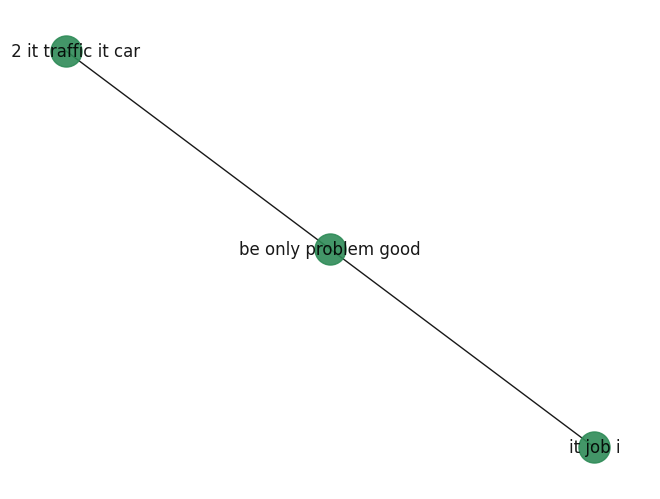

************************************************************

Summarization of review : 
Number of sentences : 1

Filtering tokens 

[('Owning', 1), ('years', 1), ('evey', 1), ('day', 1), ('traffic', 1)]
sentences with their respective strengths 

{ Owning the 612 now over 3 years and using it in evey day traffic it just keeps on being great,The paint job is the only problem, technical it fantastic and by far the best car i ever owned..: 15.0}
top 3 sentences with max strength 
[ Owning the 612 now over 3 years and using it in evey day traffic it just keeps on being great,The paint job is the only problem, technical it fantastic and by far the best car i ever owned..] 

Final Summarized Review 
 Owning the 612 now over 3 years and using it in evey day traffic it just keeps on being great,The paint job is the only problem, technical it fantastic and by far the best car i ever owned..
************************************************************

For review num :3 

POS Tagging : 
Best ->

************************************************************

Verb with subject : 

{witnessed, witnessed, blowing}
************************************************************

Adjectives : 

{'lucky', 'Best', 'controllable', 'best', 'exceptional'}
************************************************************

Ferrari 173 180 NORP
3 225 226 CARDINAL
************************************************************

Knowledge Graph : 

 Best controllable acceleration ever witnessed in a vehicle.  Breaking is mind blowing.  Handling exceptional . Seat comfort and visibility are the best I have witnessed in Ferrari lineup, and I am lucky enough to have owned 3 prior.
Best -> amod
controllable -> amod
acceleration -> nsubj
ever -> advmod
witnessed -> ROOT
in -> prep
a -> det
vehicle -> pobj
. -> punct
acceleration , well controllable witness , vehicle
Breaking -> nsubj
is -> aux
mind -> nsubj
blowing -> ROOT
. -> punct
Breaking mind , blow , 
Handling -> ROOT
exceptional -> acomp
. -> punct
 , 

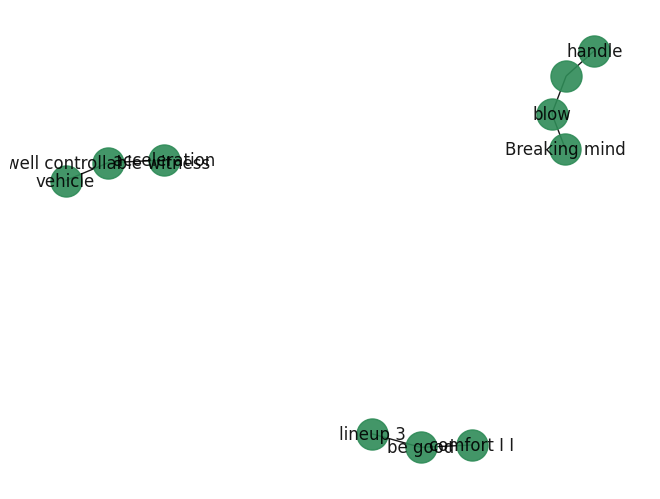

************************************************************

Summarization of review : 
Number of sentences : 4

Filtering tokens 

[('witnessed', 2), ('Best', 1), ('controllable', 1), ('acceleration', 1), ('vehicle', 1)]
sentences with their respective strengths 

{ Best controllable acceleration ever witnessed in a vehicle.  : 3.0, Breaking is mind blowing.  : 1.5, Handling exceptional .: 1.0, Seat comfort and visibility are the best I have witnessed in Ferrari lineup, and I am lucky enough to have owned 3 prior.: 5.0}
top 3 sentences with max strength 
[Seat comfort and visibility are the best I have witnessed in Ferrari lineup, and I am lucky enough to have owned 3 prior.,  Best controllable acceleration ever witnessed in a vehicle.  , Breaking is mind blowing.  ] 

Final Summarized Review 
Seat comfort and visibility are the best I have witnessed in Ferrari lineup, and I am lucky enough to have owned 3 prior.  Best controllable acceleration ever witnessed in a vehicle.   Breaking

************************************************************

Verb with subject : 

set()
************************************************************

Adjectives : 

{'interior', 'former', 'enjoyable', 'excellent', 'strong', 'wise', 'quiet'}
************************************************************

up to 7000 36 46 CARDINAL
Aston 132 137 GPE
612 141 144 CARDINAL
************************************************************

Knowledge Graph : 

 The engine is strong pulling right up to 7000 rpm, handling is excellent, yet remains fairly quiet interior wise unlike our former Aston.   612 really is an enjoyable car!
The -> det
engine -> nsubj
is -> ROOT
strong -> acomp
pulling -> xcomp
right -> quantmod
up -> quantmod
to -> quantmod
7000 -> nummod
rpm -> dobj
, -> punct
handling -> nsubj
is -> ccomp
excellent -> acomp
, -> punct
yet -> cc
remains -> conj
fairly -> advmod
quiet -> amod
interior -> amod
wise -> acomp
unlike -> prep
our -> poss
former -> amod
Aston -> pobj
. -> punct
eng

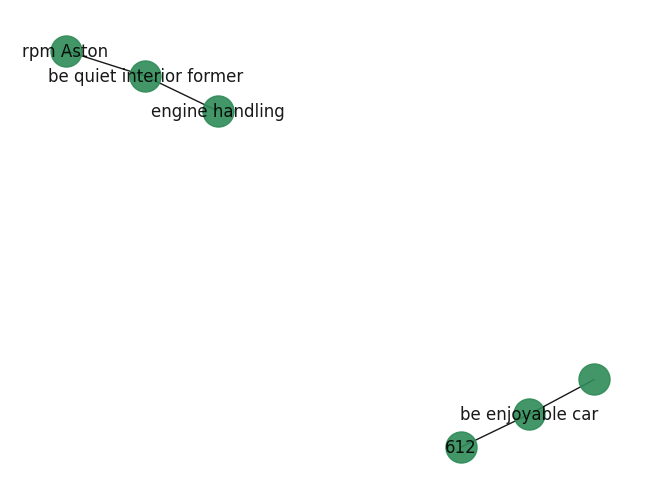

************************************************************

Summarization of review : 
Number of sentences : 2

Filtering tokens 

[('engine', 1), ('strong', 1), ('pulling', 1), ('rpm', 1), ('handling', 1)]
sentences with their respective strengths 

{ The engine is strong pulling right up to 7000 rpm, handling is excellent, yet remains fairly quiet interior wise unlike our former Aston.   : 11.0, 612 really is an enjoyable car!: 2.0}
top 3 sentences with max strength 
[ The engine is strong pulling right up to 7000 rpm, handling is excellent, yet remains fairly quiet interior wise unlike our former Aston.   , 612 really is an enjoyable car!] 

Final Summarized Review 
 The engine is strong pulling right up to 7000 rpm, handling is excellent, yet remains fairly quiet interior wise unlike our former Aston.    612 really is an enjoyable car!
************************************************************

For review num :5 

POS Tagging : 
car -> NOUN
612 -> NUM
Scaglietti -> PROPN
overlo

************************************************************

Verb with subject : 

{has, performs, run, go, owned}
************************************************************

Adjectives : 

{'satisfied'}
************************************************************

612 15 18 CARDINAL
Spider 62 68 PERSON
Ferrari 115 122 NORP
Cadillac 227 235 ORG
Viper 262 267 PRODUCT
Ferrari 312 319 NORP
************************************************************

Knowledge Graph : 

 This car, the 612 Scaglietti,  is overlooked compared to the Spider and Enzo, however it performs better than any Ferrari I have ever owned or driven in.  People go nuts over this car when you run it. It has the comforts of a Cadillac, yet the performance of a Viper.   I am truly extremely satisfied with this Ferrari.
This -> det
car -> nsubjpass
, -> punct
the -> det
612 -> nummod
Scaglietti -> nsubjpass
, -> punct
  -> dep
is -> auxpass
overlooked -> ccomp
compared -> prep
to -> prep
the -> det
Spider -> pobj
and -> 

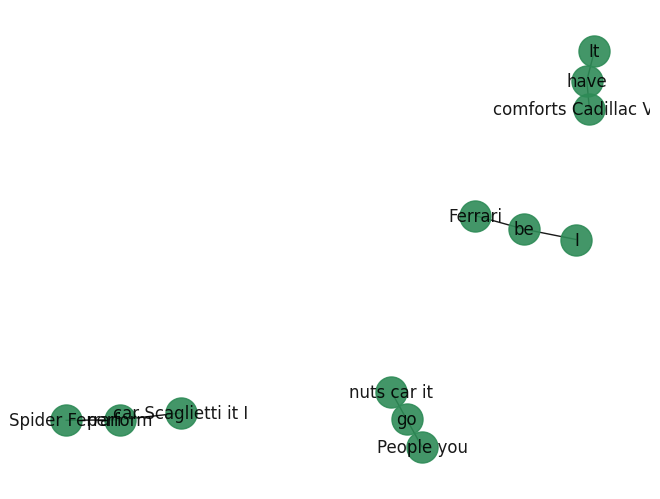

************************************************************

Summarization of review : 
Number of sentences : 4

Filtering tokens 

[('car', 2), ('Ferrari', 2), ('Scaglietti', 1), ('overlooked', 1), ('compared', 1)]
sentences with their respective strengths 

{ This car, the 612 Scaglietti,  is overlooked compared to the Spider and Enzo, however it performs better than any Ferrari I have ever owned or driven in.  : 6.0, People go nuts over this car when you run it.: 2.5, It has the comforts of a Cadillac, yet the performance of a Viper.   : 2.0, I am truly extremely satisfied with this Ferrari.: 1.5}
top 3 sentences with max strength 
[ This car, the 612 Scaglietti,  is overlooked compared to the Spider and Enzo, however it performs better than any Ferrari I have ever owned or driven in.  , People go nuts over this car when you run it., It has the comforts of a Cadillac, yet the performance of a Viper.   ] 

Final Summarized Review 
 This car, the 612 Scaglietti,  is overlooked compar

In [ ]:
brand = input('Enter a card brand name : ')
IE_brand(brand)

**Future Improvement :**

- [x] Create REST API out of NLP model and integrate with frontend

-  Collect latest data from tweets
- perform real time sentiment analysis
- Output a full report on a brand based on IE techniques







In [112]:
# Extracting tweets from twitter and saving into csv file
import tweepy
from tweepy import API, Cursor, OAuthHandler
import pandas as pd
import csv
import re 
import string
import preprocessor as p
import os

def extract_tweets(search_words):
    
    consumer_key = os.getenv['consumer_key']
    consumer_secret = os.getenv['consumer_secret']
    access_key= os.getenv['access_key']
    access_secret = os.getenv['access_secret']
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth,wait_on_rate_limit=True)

    csvFile = open('/content/tweets.csv', 'a')
    csvWriter = csv.writer(csvFile)
    
    search_words = search_words    # enter your words
    new_search = search_words + " -filter:retweets"
    
    for tweet in tweepy.Cursor(api.search_tweets,q=new_search,count=10,
                            lang="en",
                            since_id=0).items():
        csvWriter.writerow([tweet.created_at, 
        tweet.text.encode('utf-8'),
        tweet.user.screen_name.encode('utf-8'), 
        tweet.user.location.encode('utf-8')])
  


**Downloading API from github**